**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, f1_score)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r'D:\Bicycle_Lock\Machine-Learning\ECG-Based Arrhythmia Detection\Preprocessing\balanced_ecg_data.csv')  # Your balanced dataset
X = df.drop('target', axis=1)
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  
)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**SVM SK-Learn Built-in**

In [14]:
svm = SVC(
    kernel='poly',       
    C=1.0,              
    gamma='scale',      
    class_weight='balanced', 
    probability=True,    
    random_state=42
)

In [15]:
svm.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)

In [16]:
y_pred = svm.predict(X_test_scaled)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.99      1.00      1.00       110
           2       0.95      0.97      0.96       110
           3       0.91      1.00      0.95       111
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00       110
           6       1.00      1.00      1.00       111
           7       0.98      1.00      0.99       110
           8       1.00      0.84      0.91       110
           9       1.00      1.00      1.00       110
          10       1.00      1.00      1.00       110
          11       0.99      1.00      1.00       110
          12       1.00      1.00      1.00       110
          13       0.98      1.00      0.99       110
          14       1.00      0.98      0.99       110

    accuracy                           0.99      1652
   macro avg       0.99      0.99      0.99      1652
wei

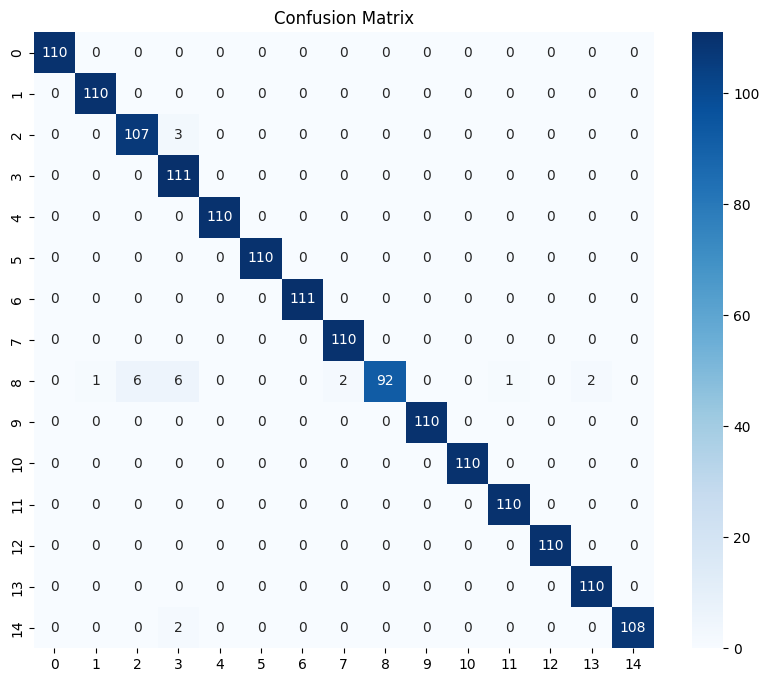

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Overall Accuracy: 0.9861 (98.61%)
